# Argentinian inflation (January 2020 - December 2020)

## Datasoruces
- *USD Prices*: https://www.datos.gob.ar/dataset/sspm-tipos-cambio-historicos/archivo/sspm_175.1
- *Inflation*: https://www.datos.gob.ar/dataset/sspm-indice-precios-al-consumidor-nacional-ipc-base-diciembre-2016/archivo/sspm_145.3

In [1]:
%pip install --upgrade pip
%pip install pandas
%pip install matplotlib
import pandas as pd
import ssl
import numpy as np
import datetime
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
ssl._create_default_https_context = ssl._create_unverified_context

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.4 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 493.9 kB/s eta 0:00:001m555.4 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 593.3 kB/s eta 0:00:0036m0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 1.4 MB/s eta 0:00:001.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
data_range_start = '2022-01-01'
data_range_end = '2024-03-06'
last_year_start = '2023-01-01'
last_year_end = '2023-12-31'
salary = 370

inflation_file = "http://infra.datos.gob.ar/catalog/sspm/dataset/145/distribution/145.3/download/indice-precios-al-consumidor-nivel-general-base-diciembre-2016-mensual.csv"
ars_usd_exchange = "http://infra.datos.gob.ar/catalog/sspm/dataset/175/distribution/175.1/download/tipos-de-cambio-historicos.csv"


ds_inf = pd.read_csv(inflation_file)
df_inf = ds_inf.filter(items=['indice_tiempo', 'ipc_ng_nacional_tasa_variacion_mensual'])
df_inf['indice_tiempo'] = pd.to_datetime(df_inf['indice_tiempo'])
df_inf['ipc_ng_nacional_tasa_variacion_mensual'] *= 100


ds_usd = pd.read_csv(ars_usd_exchange)
ds_usd['indice_tiempo'] =pd.to_datetime(ds_usd['indice_tiempo'])
df_usd = ds_usd.filter(items=['indice_tiempo', 'dolar_estadounidense','dolar_referencia_com_3500'])



In [3]:
df_inf = df_inf.rename(columns={"indice_tiempo": "date", "ipc_ng_nacional_tasa_variacion_mensual": "inflation_avg"})
df_inf = df_inf.groupby(pd.PeriodIndex(df_inf['date'], freq="M"))['inflation_avg'].median()


date
2022-01     3.875682
2022-02     4.694366
2022-03     6.728798
2022-04     6.041417
2022-05     5.056075
2022-06     5.295221
2022-07     7.406197
2022-08     6.970336
2022-09     6.165520
2022-10     6.347350
2022-11     4.916147
2022-12     5.124608
2023-01     6.027874
2023-02     6.627722
2023-03     7.675240
2023-04     8.402690
2023-05     7.772753
2023-06     5.950832
2023-07     6.344851
2023-08    12.441638
2023-09    12.749750
2023-10     8.301739
2023-11    12.810690
2023-12    25.465675
2024-01    20.614225
2024-02    13.240676
Freq: M, Name: inflation_avg, dtype: float64


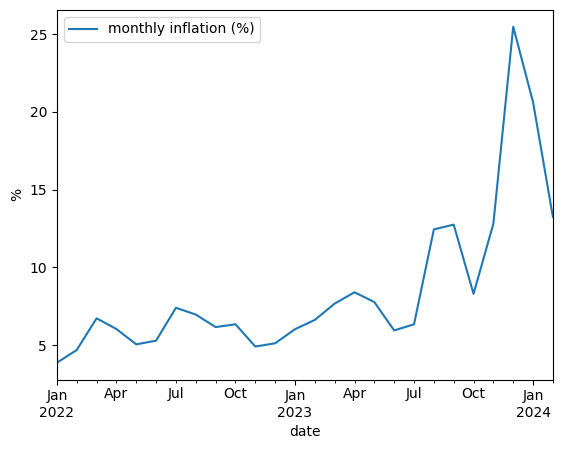

In [4]:
yearly_inflation = df_inf.loc[data_range_start:data_range_end]
graph = yearly_inflation.plot()
graph.set_xlabel('date')
graph.set_ylabel('%')
graph.legend(['monthly inflation (%)'])
print(yearly_inflation)

Text(0.5, 1.0, 'USD price evolution')

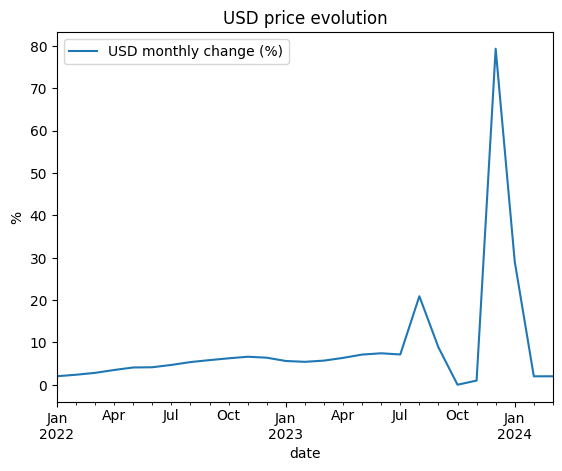

In [5]:

df_usd.set_index(['indice_tiempo'])
df_monthly_avg = df_usd.groupby(pd.PeriodIndex(df_usd['indice_tiempo'], freq="M"))['dolar_referencia_com_3500'].mean()
usd_pct_change = df_monthly_avg.pct_change(periods=1)
usd_pct_change = usd_pct_change.rename("usd_monthly_change_pct")
usd_pct_change = usd_pct_change.loc[data_range_start:data_range_end]
usd_pct_change *= 100
graph = usd_pct_change.plot()
graph.set_xlabel('date')
graph.set_ylabel('%')
graph.legend(['USD monthly change (%)'])
graph.set_title('USD price evolution')

In [6]:
#monthly % change in official dollar values
print(usd_pct_change.to_frame().rename(columns={'dolar_referencia_com_3500':'usd_monthly_change_pct'}))

               usd_monthly_change_pct
indice_tiempo                        
2022-01                      2.011590
2022-02                      2.362575
2022-03                      2.804116
2022-04                      3.483527
2022-05                      4.074019
2022-06                      4.131359
2022-07                      4.677877
2022-08                      5.350731
2022-09                      5.814107
2022-10                      6.235613
2022-11                      6.609564
2022-12                      6.385039
2023-01                      5.605499
2023-02                      5.411448
2023-03                      5.698758
2023-04                      6.338621
2023-05                      7.122121
2023-06                      7.426146
2023-07                      7.143583
2023-08                     20.887753
2023-09                      8.824137
2023-10                      0.006312
2023-11                      0.984184
2023-12                     79.299601
2024-01     

## Comparing the yearly progression of the inflation and dollar price
We plot the inflation and dollar price in the same graphic since 2020 to December 2022

         inflation_avg  usd_monthly_change_pct
2022-01       3.875682                2.011590
2022-02       4.694366                2.362575
2022-03       6.728798                2.804116
2022-04       6.041417                3.483527
2022-05       5.056075                4.074019
2022-06       5.295221                4.131359
2022-07       7.406197                4.677877
2022-08       6.970336                5.350731
2022-09       6.165520                5.814107
2022-10       6.347350                6.235613
2022-11       4.916147                6.609564
2022-12       5.124608                6.385039
2023-01       6.027874                5.605499
2023-02       6.627722                5.411448
2023-03       7.675240                5.698758
2023-04       8.402690                6.338621
2023-05       7.772753                7.122121
2023-06       5.950832                7.426146
2023-07       6.344851                7.143583
2023-08      12.441638               20.887753
2023-09      

Text(0.5, 1.0, 'Monthly inflation vs USD price change in %')

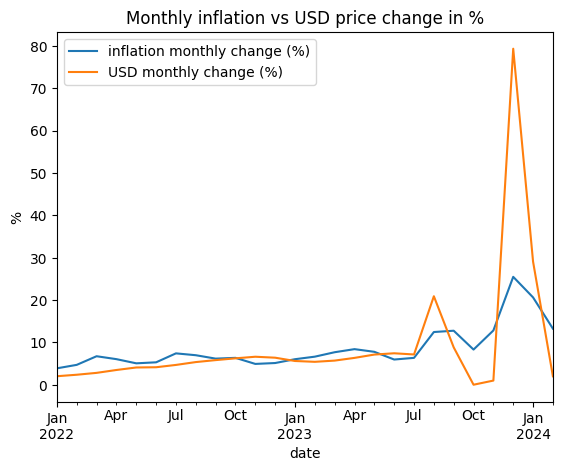

In [7]:
inf_usd_variations = yearly_inflation.to_frame()
inf_usd_variations.rename(columns={"indice_tiempo":"date"})
inflation_usd = inf_usd_variations.join(usd_pct_change, how="inner")
print(inflation_usd)
graph = inflation_usd[['inflation_avg','usd_monthly_change_pct']].plot()
graph.set_xlabel('date')
graph.set_ylabel('%')
graph.legend(['inflation monthly change (%)','USD monthly change (%)'])
graph.set_title('Monthly inflation vs USD price change in %')

## Argentinian inflation in USD
To estimate the monthly inflation percentage in US dollars, we're going to calculate the difference between the monthly inflation percentage and the precentage of change in US dollars prices with the previous month.
A new column will be added to store that difference.

         inflation_avg  usd_monthly_change_pct  usd_inflation
2022-01       3.875682                2.011590       1.864092
2022-02       4.694366                2.362575       2.331790
2022-03       6.728798                2.804116       3.924682
2022-04       6.041417                3.483527       2.557891
2022-05       5.056075                4.074019       0.982055
2022-06       5.295221                4.131359       1.163863
2022-07       7.406197                4.677877       2.728320
2022-08       6.970336                5.350731       1.619604
2022-09       6.165520                5.814107       0.351413
2022-10       6.347350                6.235613       0.111738
2022-11       4.916147                6.609564      -1.693417
2022-12       5.124608                6.385039      -1.260431
2023-01       6.027874                5.605499       0.422375
2023-02       6.627722                5.411448       1.216274
2023-03       7.675240                5.698758       1.976482
2023-04 

Text(0.5, 1.0, 'Argentinian inflation expressed in USD')

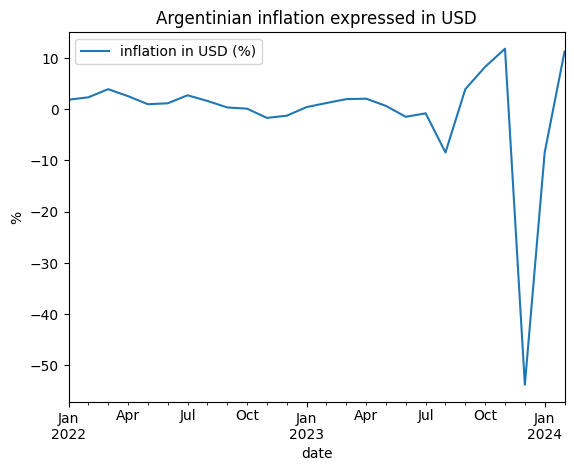

In [8]:
inflation_usd['usd_inflation'] = inflation_usd['inflation_avg'] - inflation_usd['usd_monthly_change_pct']
print(inflation_usd)
graph = inflation_usd['usd_inflation'].plot()
graph.set_xlabel('date')
graph.set_ylabel('%')
graph.legend(['inflation in USD (%)'])
graph.set_title('Argentinian inflation expressed in USD')

In [9]:
mean_year_usd_inflation = inflation_usd['usd_inflation'].loc[last_year_start: last_year_end].sum()
new_salary = salary * (1 + (mean_year_usd_inflation/100))
print("The average annual inflation in USD is {}%".format(round(mean_year_usd_inflation,2)))
print("Having into consideration an annual inflation in USD of {}%, the new salary should be around ${}".format(round(mean_year_usd_inflation,2),round(new_salary,2)))

The average annual inflation in USD is -34.18%
Having into consideration an annual inflation in USD of -34.18%, the new salary should be around $243.55
